### Thư viện

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pip install pyclustering
%pip install prettytable
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=a698e98142e858ed48626e5d0cb76455ea0d1860fadae7f154dc380d9ece39bb
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visualisation
from matplotlib.pyplot import xticks

# Scaler
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# BANG-clustering
from pyclustering.cluster.bang import bang, bang_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# K_mean
from sklearn.cluster import KMeans

# Silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

# PrettyTable
from prettytable import PrettyTable

In [4]:
# data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Data

In [5]:
# tải file từ google drive
!gdown 1tTyL-mgcXWnZiei8AvVprex1P35iEKIp

Downloading...
From: https://drive.google.com/uc?id=1tTyL-mgcXWnZiei8AvVprex1P35iEKIp
To: /content/Country-data_cleaned.csv
100% 7.58k/7.58k [00:00<00:00, 17.6MB/s]


In [6]:
df_cleaned = pd.read_csv(r'Country-data_cleaned.csv')

In [7]:
df_cleaned.shape[0]

111

### Chuẩn hóa dữ liệu

In [8]:
df = df_cleaned.copy()

In [9]:
# Create a scaling object
scaler = StandardScaler()
# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income',
           'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
df[varlist] = scaler.fit_transform(df[varlist])

In [10]:
df.shape[0]

111

### Chỉnh dạng dữ liệu

In [11]:
pca = IncrementalPCA(n_components=2)
# Putting feature variable to X
X = df.drop(['country'],axis=1)
# Putting response variable to y
y = df['country']
pca.fit(X)

IncrementalPCA(n_components=2)

In [12]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.347053,0.312438,child_mort
1,0.339088,0.312578,exports
2,0.355327,0.170512,health
3,0.355880,0.065241,imports
4,0.380572,0.245965,income
5,-0.080410,0.655855,inflation
6,0.320373,-0.327534,life_expec
7,-0.336540,0.333334,total_fer
8,0.380088,0.249623,gdpp


In [13]:
df_pca = pca.fit_transform(X)
print(df_pca.shape)
df_pca = pd.DataFrame(df_pca)
df_pca

(111, 2)


,0,1
0,-3.261996,0.661249
1,1.278561,-1.302147
2,0.847099,0.528581
3,-2.154828,3.190433
4,3.083267,2.047718
...,...,...
106,-1.049480,-0.096031
107,-0.605183,-0.817434
108,-0.295497,-0.835275
109,-1.930999,1.433658


### Chạy thuật toán

In [42]:
# Read data three dimensional data.
# data = read_sample(FCPS_SAMPLES.SAMPLE_CHAINLINK)
data = df_pca.iloc[:,:].values

# Prepare algorithm's parameters.
levels = 8

# Create instance of BANG algorithm.
bang_instance = bang(data, levels, metric='euclidean')
bang_instance.process()

In [43]:
# Obtain clustering results.
clusters = bang_instance.get_clusters()
noise = bang_instance.get_noise()
directory = bang_instance.get_directory()
dendrogram = bang_instance.get_dendrogram()

In [47]:
clusterS = clusters.copy()

In [17]:
print(f'Kết quả các giá trị theo clusters là: {clusters}')
print(f'Kết quả các giá trị nhiễu là: {noise}')

Kết quả các giá trị theo clusters là: [[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110], [84, 22, 63], [51, 4], [3], [27], [36], [26]]
Kết quả các giá trị nhiễu là: []


In [18]:
for i, cluster in enumerate(clusters):
    print(f'Cụm {i + 1}: Số lượng điểm {len(cluster)}')

Cụm 1: Số lượng điểm 102
Cụm 2: Số lượng điểm 3
Cụm 3: Số lượng điểm 2
Cụm 4: Số lượng điểm 1
Cụm 5: Số lượng điểm 1
Cụm 6: Số lượng điểm 1
Cụm 7: Số lượng điểm 1


In [19]:
for i, cluster in enumerate(clusters):
    print(f'Cụm {i + 1}:')
    for index in cluster:
        print(f'    ~ Điểm {index}: {data[index]}')

Cụm 1:
    ~ Điểm 0: [-3.26199558  0.66124889]
    ~ Điểm 1: [ 1.27856065 -1.30214717]
    ~ Điểm 2: [0.84709947 0.5285812 ]
    ~ Điểm 5: [ 0.35956019 -1.19054485]
    ~ Điểm 6: [1.51146601 1.12415075]
    ~ Điểm 7: [-1.37125973 -1.31774923]
    ~ Điểm 8: [2.63950226 0.9319004 ]
    ~ Điểm 9: [ 1.11133214 -0.99444023]
    ~ Điểm 10: [-2.95154199 -0.40260878]
    ~ Điểm 11: [-0.17403817 -1.0131912 ]
    ~ Điểm 12: [-0.80039719 -0.5952445 ]
    ~ Điểm 13: [ 2.0484075  -1.57014579]
    ~ Điểm 14: [1.25504558 1.51190909]
    ~ Điểm 15: [3.09683577 0.50796367]
    ~ Điểm 16: [ 3.14284446 -0.53375863]
    ~ Điểm 17: [-3.44352362  0.53963484]
    ~ Điểm 18: [-3.5272201   0.95465395]
    ~ Điểm 19: [-1.40378483 -1.4018608 ]
    ~ Điểm 20: [-2.86375805 -0.0445602 ]
    ~ Điểm 21: [ 0.29524181 -1.58918117]
    ~ Điểm 23: [ 0.95334896 -1.01426298]
    ~ Điểm 24: [ 1.5556771 -1.0007454]
    ~ Điểm 25: [-2.45185441 -0.61645155]
    ~ Điểm 28: [ 3.55474986 -0.02704204]
    ~ Điểm 29: [-2.91938618  

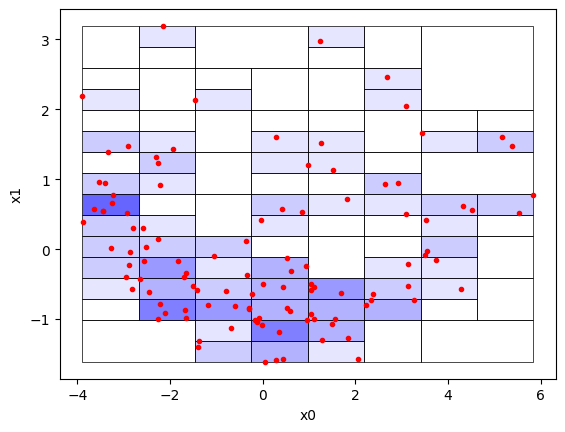

In [20]:
# Visualize BANG clustering results.
bang_visualizer.show_blocks(directory)

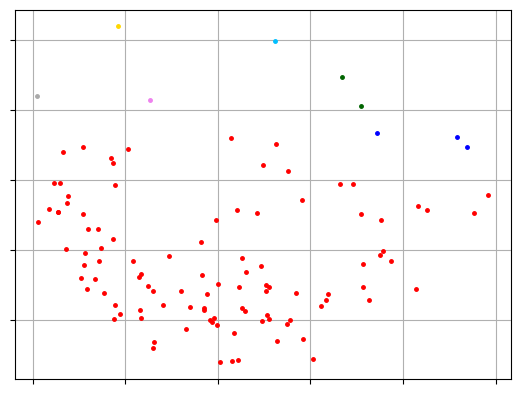

In [21]:
bang_visualizer.show_clusters(data, clusters, noise)

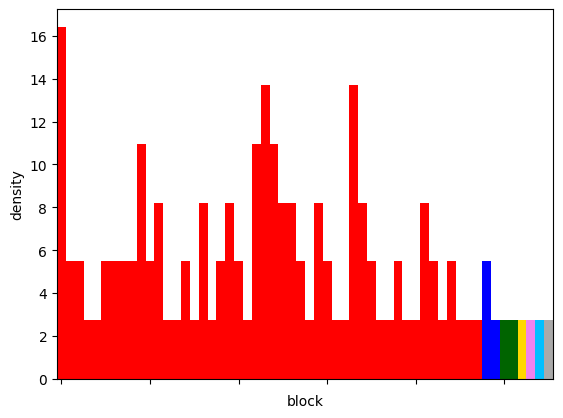

In [22]:
bang_visualizer.show_dendrogram(dendrogram)

### Phân tích cụm

In [23]:
# Tạo cột mới tên là 'Cluster' cho bộ dữ liệu trước khi Chuẩn hóa dữ liệu
# Giả sử gán các điểm cho cụm 0 trước
df_cleaned['Cluster'] = 0

# gán nhãn clusters thực hiện được từ giải thuật cho dataframe để phân tích
for i, cluster in enumerate(clusters):
    df_cleaned.loc[cluster, 'Cluster'] = i + 1
df_cleaned

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,4
4,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,3
...,...,...,...,...,...,...,...,...,...,...,...
106,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,1
107,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,1
108,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1
109,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,1


Thực hiện phân tích cụm theo GDP

`gdpp`: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [24]:
# tính trung bình group by theo cụm
cluster_avg_gdp = df_cleaned.groupby('Cluster')['gdpp'].mean()
clusters = cluster_avg_gdp.index
avg_gdp = cluster_avg_gdp.values
gdp_clusterdf = pd.DataFrame({'Cluster': clusters, 'Average GDP': avg_gdp})
gdp_clusterdf

,Cluster,Average GDP
0,1,3483.686275
1,2,10890.000000
2,3,9685.000000
3,4,3530.000000
4,5,2740.000000
5,6,8750.000000
6,7,334.000000


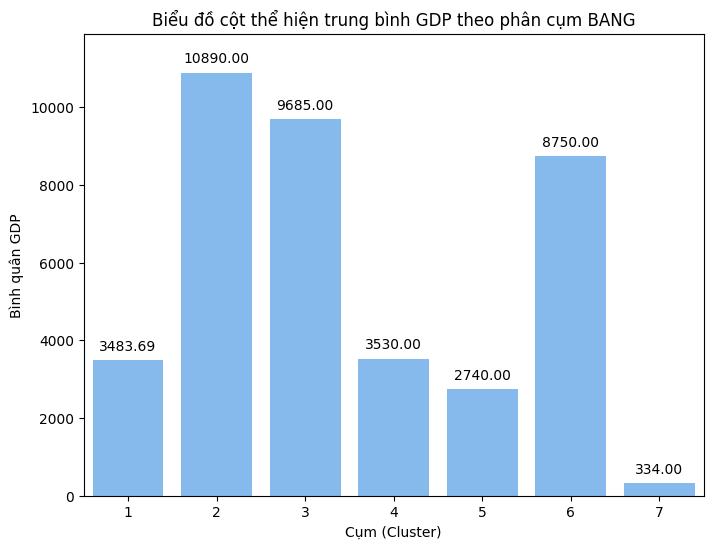

In [25]:
plt.figure(figsize=(8, 6))
plt.ylim(0, max(avg_gdp)+1000)
plot = sns.barplot(x='Cluster', y='Average GDP', data=gdp_clusterdf, color=sns.xkcd_rgb['sky blue'])
plt.xlabel('Cụm (Cluster)')
plt.ylabel('Bình quân GDP')
plt.title('Biểu đồ cột thể hiện trung bình GDP theo phân cụm BANG')
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [26]:
# kiểm tra tên quốc gia theo cụm để áp dụng tri thức phân tích
for cluster in df_cleaned['Cluster'].unique():
    countries_in_cluster = df_cleaned[df_cleaned['Cluster'] == cluster]['country'].tolist()
    # in cụm và quốc gia
    print(f'Cụm {cluster} ({len(countries_in_cluster)} quốc gia): {"; ".join(countries_in_cluster)}')

Cụm 1 (102 quốc gia): Afghanistan; Albania; Algeria; Armenia; Azerbaijan; Bangladesh; Belarus; Belize; Benin; Bhutan; Bolivia; Bosnia and Herzegovina; Botswana; Brazil; Bulgaria; Burkina Faso; Burundi; Cambodia; Cameroon; Cape Verde; China; Colombia; Comoros; Costa Rica; Cote d'Ivoire; Dominican Republic; Ecuador; Egypt; El Salvador; Eritrea; Fiji; Gambia; Georgia; Ghana; Grenada; Guatemala; Guinea; Guinea-Bissau; Guyana; India; Indonesia; Iran; Iraq; Jamaica; Jordan; Kenya; Kiribati; Kyrgyz Republic; Lao; Latvia; Lebanon; Lesotho; Liberia; Macedonia, FYR; Madagascar; Malawi; Maldives; Mali; Mauritania; Mauritius; Micronesia, Fed. Sts.; Moldova; Montenegro; Morocco; Mozambique; Myanmar; Namibia; Nepal; Niger; Pakistan; Panama; Paraguay; Peru; Philippines; Poland; Romania; Rwanda; Samoa; Senegal; Serbia; Solomon Islands; South Africa; Sri Lanka; St. Vincent and the Grenadines; Sudan; Suriname; Tajikistan; Tanzania; Thailand; Togo; Tonga; Tunisia; Turkey; Turkmenistan; Uganda; Ukraine; U

Thực hiện phân tích cụm theo doanh thu mỗi cá thể

`Income`: Net income per person

In [27]:
cluster_avginc = df_cleaned.groupby('Cluster')['income'].mean()
clusters = cluster_avginc.index
avg_inc = cluster_avginc.values
inc_clusterdf = pd.DataFrame({'Cluster': clusters, 'Average Income': avg_inc})
inc_clusterdf

,Cluster,Average Income
0,1,7204.078431
1,2,21200.000000
2,3,19400.000000
3,4,5900.000000
4,5,5190.000000
5,6,15400.000000
6,7,609.000000


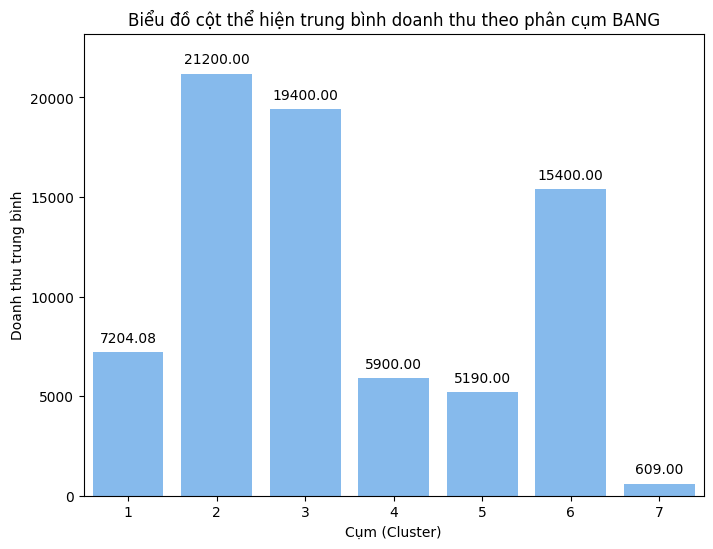

In [28]:
plt.figure(figsize=(8, 6))
plt.ylim(0, max(avg_inc)+2000)
plot = sns.barplot(x='Cluster', y='Average Income', data=inc_clusterdf, color=sns.xkcd_rgb['sky blue'])
plt.xlabel('Cụm (Cluster)')
plt.ylabel('Doanh thu trung bình')
plt.title('Biểu đồ cột thể hiện trung bình doanh thu theo phân cụm BANG')
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Thực hiện phân tích cụm theo tỷ lệ sinh nở mỗi phụ nữ

`total_fer`: The number of children that would be born to each woman if the current age-fertility rates remain the same.

In [29]:
cluster_avgtfr = df_cleaned.groupby('Cluster')['total_fer'].mean()
clusters = cluster_avgtfr.index
avg_tfr = cluster_avgtfr.values
tfr_clusterdf = pd.DataFrame({'Cluster': clusters, 'Average Fertility rate': avg_tfr})
tfr_clusterdf

,Cluster,Average Fertility rate
0,1,3.254510
1,2,1.866667
2,3,2.485000
3,4,6.160000
4,5,4.950000
5,6,4.080000
6,7,6.540000


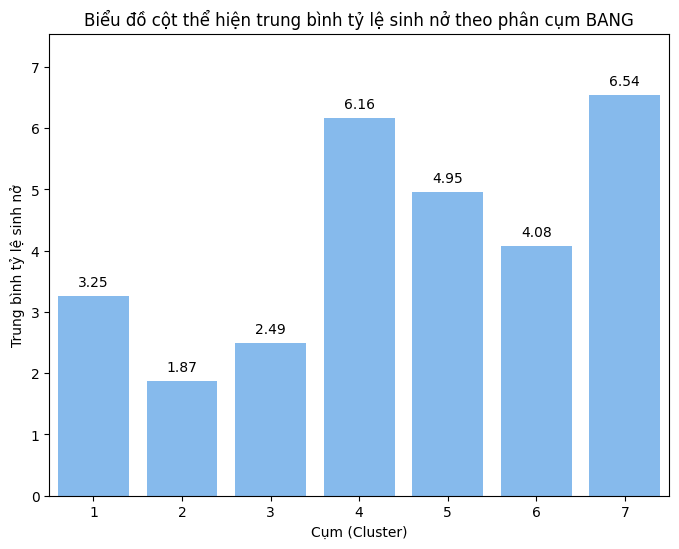

In [30]:
plt.figure(figsize=(8, 6))
plt.ylim(0, max(avg_tfr)+1)
plot = sns.barplot(x='Cluster', y='Average Fertility rate', data=tfr_clusterdf, color=sns.xkcd_rgb['sky blue'])
plt.xlabel('Cụm (Cluster)')
plt.ylabel('Trung bình tỷ lệ sinh nở')
plt.title('Biểu đồ cột thể hiện trung bình tỷ lệ sinh nở theo phân cụm BANG')
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Thực hiện phân tích cụm theo tuổi thọ trung bình

`life_expec`: The average number of years a new born child would live if the current mortality patterns are to remain the same

In [31]:
cluster_avgle = df_cleaned.groupby('Cluster')['life_expec'].mean()
clusters = cluster_avgle.index
avg_le = cluster_avgle.values
le_clusterdf = pd.DataFrame({'Cluster': clusters, 'Average Life_expec': avg_le})
le_clusterdf

,Cluster,Average Life_expec
0,1,68.010784
1,2,74.266667
2,3,72.100000
3,4,60.100000
4,5,60.400000
5,6,62.900000
6,7,57.500000


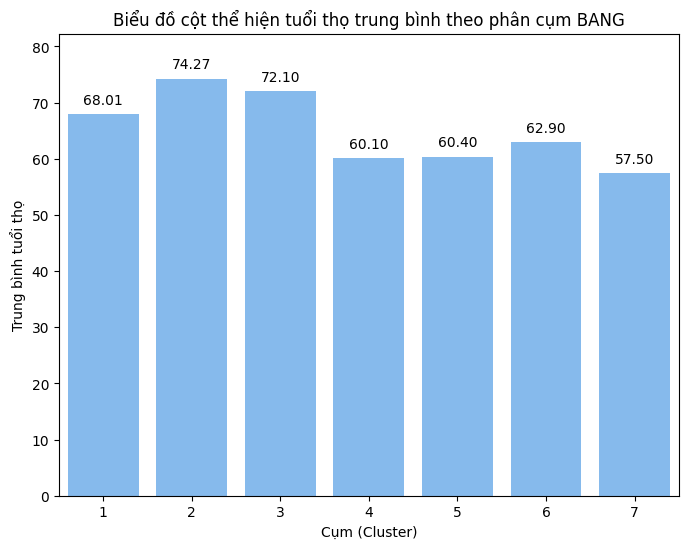

In [32]:
plt.figure(figsize=(8, 6))
plt.ylim(0, max(avg_le)+8)
plot = sns.barplot(x='Cluster', y='Average Life_expec', data=le_clusterdf, color=sns.xkcd_rgb['sky blue'])
plt.xlabel('Cụm (Cluster)')
plt.ylabel('Trung bình tuổi thọ')
plt.title('Biểu đồ cột thể hiện tuổi thọ trung bình theo phân cụm BANG')
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### Đánh giá thuật toán

#### Đánh giá bằng silhouette score

In [48]:
#Thêm cluster vào dataframe
df_pca_test = df_pca.copy()
df_pca_test['Cluster'] = 0
for i, cluster in enumerate(clusterS):
  df_pca_test.loc[cluster, 'Cluster'] = i

In [55]:
#Số lượng giá trị trong mỗi cluster
for i in range(0, 7):
    cluster_size = df_pca_test.loc[df_pca_test['Cluster'] == i].shape[0]
    print(f"Các giá trị thuộc cluster {i}: {cluster_size} (chiếm) {((cluster_size/df_pca_test.shape[0])*100):.2f}%")

Các giá trị thuộc cluster 0: 102 (chiếm) 95.33%
Các giá trị thuộc cluster 1: 3 (chiếm) 2.80%
Các giá trị thuộc cluster 2: 2 (chiếm) 1.87%
Các giá trị thuộc cluster 3: 0 (chiếm) 0.00%
Các giá trị thuộc cluster 4: 0 (chiếm) 0.00%
Các giá trị thuộc cluster 5: 0 (chiếm) 0.00%
Các giá trị thuộc cluster 6: 0 (chiếm) 0.00%


In [56]:
# Tính toán Silhouette Score
df_pca_test = df_pca_test.loc[(df_pca_test['Cluster'] != 3) &
              (df_pca_test['Cluster'] != 4) & (df_pca_test['Cluster'] != 5) &
              (df_pca_test['Cluster'] != 6)]
labels = df_pca_test['Cluster']
X = df_pca_test.drop(columns = 'Cluster', inplace = False)

sample_silhouette_values = silhouette_samples(X, labels)

data = {'DataPoint': range(len(X)), 'Cluster': labels,
        'SilhouetteScore': sample_silhouette_values}
sil_score = pd.DataFrame(data)
print(sil_score[['Cluster', 'SilhouetteScore']])

     Cluster  SilhouetteScore
0          0         0.452512
1          0         0.309965
2          0         0.054622
4          2         0.655113
5          0         0.445152
..       ...              ...
106        0         0.499454
107        0         0.518154
108        0         0.501110
109        0         0.361373
110        0         0.383959

[107 rows x 2 columns]


In [57]:
#Hàm tính các giá trị
def comparison(data, clusterx , avg_sil_score):
  cluster = data[data['Cluster'] == clusterx]
  smaller = cluster.loc[cluster['SilhouetteScore'] < avg_sil_score].shape[0]
  bigger  = cluster.loc[cluster['SilhouetteScore'] > avg_sil_score].shape[0]
  minus   = cluster.loc[cluster['SilhouetteScore'] < 0].shape[0]
  per_minus = minus/cluster.shape[0]
  per = bigger/cluster.shape[0]
  return clusterx, bigger ,smaller ,  minus, per, per_minus

In [58]:
#Bảng so sánh kết quả
Table_BANG = PrettyTable(['Cluster','Bigger', 'Smaller', 'Minus', 'Per > mean', 'Per < 0'])
sumB, sumS, sumM = 0, 0 , 0
clus_num = [0,1,2]
avg_sil_score = sil_score['SilhouetteScore'].to_numpy().mean()
for i in clus_num:
  c, b , s, m, p, pm  = comparison(sil_score, i,avg_sil_score )
  Table_BANG.add_row([c, b, s, m, p*100, pm*100])
  sumB  += b
  sumS  += s
  sumM  += m

Table_BANG.add_row(['all', sumB, sumS, sumM, (sumB/sil_score.shape[0])*100, (sumM/sil_score.shape[0])*100])
print(Table_BANG)

+---------+--------+---------+-------+-------------------+--------------------+
| Cluster | Bigger | Smaller | Minus |     Per > mean    |      Per < 0       |
+---------+--------+---------+-------+-------------------+--------------------+
|    0    |   73   |    29   |   22  | 71.56862745098039 | 21.568627450980394 |
|    1    |   2    |    1    |   1   | 66.66666666666666 | 33.33333333333333  |
|    2    |   2    |    0    |   0   |       100.0       |        0.0         |
|   all   |   77   |    30   |   23  | 71.96261682242991 | 21.49532710280374  |
+---------+--------+---------+-------+-------------------+--------------------+


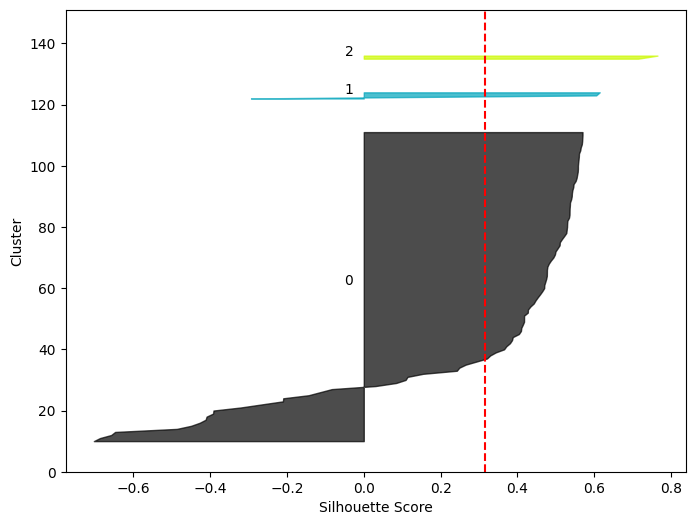

In [59]:
# Tính silhouette score cho mỗi điểm dữ liệu
silhouette_scores = silhouette_samples(df_pca_test, df_pca_test['Cluster'])

# Tính silhouette score trung bình cho toàn bộ dữ liệu
average_silhouette_score = silhouette_score(df_pca_test, df_pca_test['Cluster'])

# Vẽ biểu đồ silhouette
fig, ax = plt.subplots(figsize=(8, 6))

# Vị trí bắt đầu của cluster trên biểu đồ silhouette
y_lower = 10
for i in np.unique(df_pca_test['Cluster']):
    cluster_silhouette_scores = silhouette_scores[df_pca_test['Cluster'] == i]
    cluster_silhouette_scores.sort()
    # Độ dày của thanh silhouette cho từng mẫu
    y_upper = y_lower + cluster_silhouette_scores.shape[0]
    # Màu sắc cho cluster
    color = plt.cm.nipy_spectral(float(i) / np.unique(df_pca_test['Cluster']).shape[0])
    # Vẽ thanh silhouette cho từng mẫu
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    # Đánh dấu tên cluster
    ax.text(-0.05, y_lower + 0.5 * cluster_silhouette_scores.shape[0], str(i))
    # Cập nhật vị trí bắt đầu của cluster tiếp theo
    y_lower = y_upper + 10

# Vẽ đường trung bình cắt ngang biểu đồ
ax.axvline(x=average_silhouette_score, color='red', linestyle='--')

# Đặt giới hạn trục y
ax.set_ylim([0, len(df) + (len(np.unique(df_pca_test['Cluster'])) + 1) * 10])

# Đặt tên trục x và y
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Cluster')
plt.show()

#### So sánh với các thuật toán phân cụm khác (K-means, HAC)

##### HAC

In [60]:
mergings = linkage(df_pca, method = 'complete', metric='euclidean')
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))

In [61]:
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ['PC1', 'PC2', 'Cluster']
df_pca_hc

,PC1,PC2,Cluster
0,-3.261996,0.661249,0
1,1.278561,-1.302147,1
2,0.847099,0.528581,2
3,-2.154828,3.190433,0
4,3.083267,2.047718,2
...,...,...,...
106,-1.049480,-0.096031,3
107,-0.605183,-0.817434,3
108,-0.295497,-0.835275,3
109,-1.930999,1.433658,0


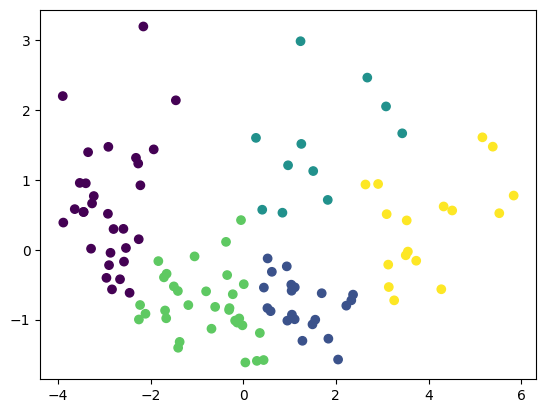

In [62]:
plt.scatter(x=df_pca_hc.PC1, y=df_pca_hc.PC2, c=df_pca_hc.Cluster)

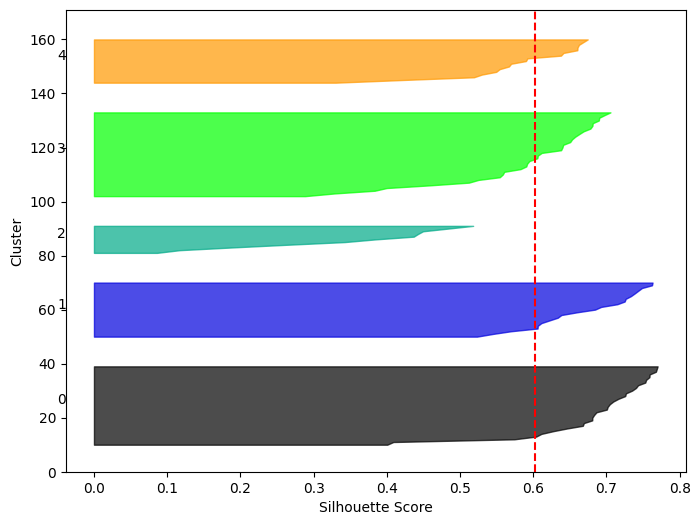

In [63]:
# Tính silhouette score cho mỗi điểm dữ liệu
silhouette_scores = silhouette_samples(df_pca_hc, df_pca_hc['Cluster'])

# Tính silhouette score trung bình cho toàn bộ dữ liệu
average_silhouette_score = silhouette_score(df_pca_hc, df_pca_hc['Cluster'])

# Vẽ biểu đồ silhouette
fig, ax = plt.subplots(figsize=(8, 6))

# Vị trí bắt đầu của cluster trên biểu đồ silhouette
y_lower = 10
for i in np.unique(df_pca_hc['Cluster']):
    cluster_silhouette_scores = silhouette_scores[df_pca_hc['Cluster'] == i]
    cluster_silhouette_scores.sort()
    # Độ dày của thanh silhouette cho từng mẫu
    y_upper = y_lower + cluster_silhouette_scores.shape[0]
    # Màu sắc cho cluster
    color = plt.cm.nipy_spectral(float(i) / np.unique(df_pca_hc['Cluster']).shape[0])
    # Vẽ thanh silhouette cho từng mẫu
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    # Đánh dấu tên cluster
    ax.text(-0.05, y_lower + 0.5 * cluster_silhouette_scores.shape[0], str(i))
    # Cập nhật vị trí bắt đầu của cluster tiếp theo
    y_lower = y_upper + 10

# Vẽ đường trung bình cắt ngang biểu đồ
ax.axvline(x=average_silhouette_score, color='red', linestyle='--')

# Đặt giới hạn trục y
ax.set_ylim([0, len(df) + (len(np.unique(df_pca_hc['Cluster'])) + 1) * 10])

# Đặt tên trục x và y
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Cluster')
plt.show()

In [64]:
labels_hc = df_pca_hc['Cluster']
X_hc = df_pca_hc.drop(columns = 'Cluster', inplace = False)

silhouette_avg_hc = silhouette_score(X_hc, labels_hc)
sample_silhouette_values_hc = silhouette_samples(X_hc, labels_hc)

data_hc = {'DataPoint': range(len(X_hc)), 'Cluster': labels_hc,
           'SilhouetteScore': sample_silhouette_values_hc}
sil_score_hc = pd.DataFrame(data_hc)
print(sil_score_hc[['Cluster', 'SilhouetteScore']])

     Cluster  SilhouetteScore
0          0         0.666327
1          1         0.624459
2          2        -0.070324
3          0         0.334823
4          2         0.099776
..       ...              ...
106        3         0.467603
107        3         0.534458
108        3         0.416182
109        0         0.403306
110        0         0.596918

[111 rows x 2 columns]


In [65]:
#Bảng so sánh kết quả
Table_HAC = PrettyTable(['Cluster','Bigger', 'Smaller','Minus' ,'Per > mean', 'Per < 0'])
sumB_hc, sumS_hc, sumM_hc = 0, 0 ,0
avg_sil_score_hc = sil_score_hc['SilhouetteScore'].to_numpy().mean()
for i in range(0,5):
  c, b , s, m, p, pm  = comparison(sil_score_hc, i,avg_sil_score_hc)
  Table_HAC.add_row([c, b, s, m, p*100, pm*100])
  sumB_hc  += b
  sumS_hc  += s
  sumM_hc  += m
Table_HAC.add_row(['all', sumB_hc, sumS_hc, sumM_hc, (sumB_hc/sil_score_hc.shape[0])*100,(sumM_hc/sil_score_hc.shape[0])*100 ])
print(Table_HAC)

+---------+--------+---------+-------+--------------------+-------------------+
| Cluster | Bigger | Smaller | Minus |     Per > mean     |      Per < 0      |
+---------+--------+---------+-------+--------------------+-------------------+
|    0    |   22   |    8    |   0   | 73.33333333333333  |        0.0        |
|    1    |   17   |    4    |   0   | 80.95238095238095  |        0.0        |
|    2    |   2    |    9    |   3   | 18.181818181818183 | 27.27272727272727 |
|    3    |   13   |    19   |   3   |       40.625       |       9.375       |
|    4    |   11   |    6    |   1   | 64.70588235294117  |  5.88235294117647 |
|   all   |   65   |    46   |   7   | 58.55855855855856  | 6.306306306306306 |
+---------+--------+---------+-------+--------------------+-------------------+


##### K-means

In [66]:
df_pca_kmean = df_pca.copy()
df_pca_kmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       111 non-null    float64
 1   1       111 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [69]:
def find_best_k(data, k_max):
    best_k = 0
    best_silhouette_score = float('-inf')
    for k in range(2, k_max + 1):
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(data)
        sample_silhouette_values = silhouette_samples(data, labels)
        avg_sil_score = sample_silhouette_values.mean()
        if (avg_sil_score > best_silhouette_score):
            best_silhouette_score = avg_sil_score
            best_k = k
    print(f'Kết quả tốt nhất: k = {best_k} ;','silhouette_score = {best_silhouette_score}')

In [68]:
find_best_k(df_pca_kmean, 12)


Kết quả tốt nhất: k = 3 ; silhouette_score = {best_silhouette_score}


In [70]:
k = 3
model = KMeans(n_clusters = k)
model.fit(df_pca_kmean)

KMeans(n_clusters=3)

In [71]:
# get the cluster labels and silhouette samples
cluster_labels = model.labels_
sample_silhouette_values = silhouette_samples(df_pca_kmean, cluster_labels)

# add the cluster labels and silhouette scores to your DataFrame
df_pca_kmean['Cluster'] = cluster_labels
df_pca_kmean['SilhouetteScore'] = sample_silhouette_values
print(df_pca_kmean)

            0         1  Cluster  SilhouetteScore
0   -3.261996  0.661249        0         0.676070
1    1.278561 -1.302147        2         0.590032
2    0.847099  0.528581        2         0.509074
3   -2.154828  3.190433        0         0.330633
4    3.083267  2.047718        1         0.446904
..        ...       ...      ...              ...
106 -1.049480 -0.096031        0         0.085823
107 -0.605183 -0.817434        2         0.319614
108 -0.295497 -0.835275        2         0.479257
109 -1.930999  1.433658        0         0.477535
110 -2.910195  1.470137        0         0.596428

[111 rows x 4 columns]


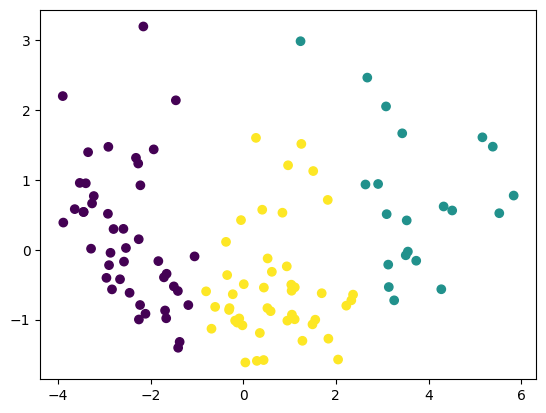

In [72]:
df_pca_kmean.columns = ['PC1', 'PC2', 'Cluster','SilhouetteScore' ]
plt.scatter(x=df_pca_kmean.PC1, y=df_pca_kmean.PC2, c=df_pca_kmean.Cluster)

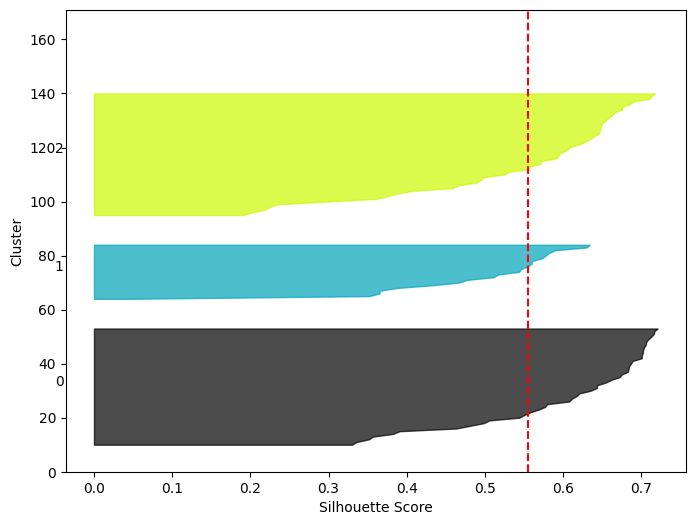

In [73]:
# Tính silhouette score cho mỗi điểm dữ liệu
silhouette_scores = silhouette_samples(df_pca_kmean, df_pca_kmean['Cluster'])

# Tính silhouette score trung bình cho toàn bộ dữ liệu
average_silhouette_score = silhouette_score(df_pca_kmean, df_pca_kmean['Cluster'])

# Vẽ biểu đồ silhouette
fig, ax = plt.subplots(figsize=(8, 6))

# Vị trí bắt đầu của cluster trên biểu đồ silhouette
y_lower = 10
for i in np.unique(df_pca_kmean['Cluster']):
    cluster_silhouette_scores = silhouette_scores[df_pca_kmean['Cluster'] == i]
    cluster_silhouette_scores.sort()
    # Độ dày của thanh silhouette cho từng mẫu
    y_upper = y_lower + cluster_silhouette_scores.shape[0]
    # Màu sắc cho cluster
    color = plt.cm.nipy_spectral(float(i) / np.unique(df_pca_kmean['Cluster']).shape[0])
    # Vẽ thanh silhouette cho từng mẫu
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    # Đánh dấu tên cluster
    ax.text(-0.05, y_lower + 0.5 * cluster_silhouette_scores.shape[0], str(i))
    # Cập nhật vị trí bắt đầu của cluster tiếp theo
    y_lower = y_upper + 10

# Vẽ đường trung bình cắt ngang biểu đồ
ax.axvline(x=average_silhouette_score, color='red', linestyle='--')

# Đặt giới hạn trục y
ax.set_ylim([0, len(df) + (len(np.unique(df_pca_hc['Cluster'])) + 1) * 10])

# Đặt tên trục x và y
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Cluster')
plt.show()

In [74]:
#Bảng so sánh kết quả
Table_Kmean = PrettyTable(['Cluster','Bigger', 'Smaller','Minus' ,'Per > mean', 'Per < 0'])
sumB_kmean, sumS_kmean, sumM_kmean = 0, 0, 0
avg_sil_score_kmean = df_pca_kmean['SilhouetteScore'].to_numpy().mean()
for i in range(0,3):
  c, b , s, m, p, pm  = comparison(df_pca_kmean, i,avg_sil_score_kmean )
  Table_Kmean.add_row([c, b, s, m, p*100, pm*100])
  sumB_kmean  += b
  sumS_kmean  += s
  sumM_kmean  += m
Table_Kmean.add_row(['all', sumB_kmean, sumS_kmean, sumM_kmean ,((sumB_kmean/df_pca_kmean.shape[0])*100),((sumM_kmean/df_pca_kmean.shape[0])*100)])
print(Table_Kmean)

+---------+--------+---------+-------+-------------------+---------+
| Cluster | Bigger | Smaller | Minus |     Per > mean    | Per < 0 |
+---------+--------+---------+-------+-------------------+---------+
|    0    |   30   |    14   |   0   | 68.18181818181817 |   0.0   |
|    1    |   12   |    9    |   0   | 57.14285714285714 |   0.0   |
|    2    |   27   |    19   |   0   | 58.69565217391305 |   0.0   |
|   all   |   69   |    42   |   0   | 62.16216216216216 |   0.0   |
+---------+--------+---------+-------+-------------------+---------+
